In [1]:
%display latex

# Symbolic Sum

Sum the first $n$ integers:

In [2]:
k, n = var('k n')

In [3]:
sum(k, k, 1, n)

1/2*n^2 + 1/2*n

In [4]:
sum(k, k, 1, n).factor()

1/2*(n + 1)*n

Summing with binomial expansion:

In [5]:
n, k, y = var('n k y')

In [6]:
expr = binomial(n, k) * x^k * y^(n-k)
expr

x^k*y^(-k + n)*binomial(n, k)

In [7]:
sum(expr, k, 0, n)

(x + y)^n

Geometric sum:

In [8]:
a, r, k = var('a r k')

In [9]:
expr = a * r ^ k
expr

a*r^k

In [10]:
sum(expr.substitute(a == 1, r == 1/2), k, 1, oo)

1

In [11]:
sum(expr.substitute(a == 1, r == 1/2), k, 1, n)

(2^n - 1)/2^n

In [12]:
sum(expr.substitute(a == 1), k, 1, n)

(r^(n + 1) - r)/(r - 1)

Handling divergent sums:

In [13]:
try:
    sum(expr.substitute(a == 1, r == 2), k, 1, oo)
except ValueError as e:
    print(e)

Sum is divergent.


Sums with assumptions:

In [14]:
a, q, k = var('a q k')

assume(abs(q) < 1)
sum(a*q^k, k, 0, infinity)

-a/(q - 1)

# Sequences

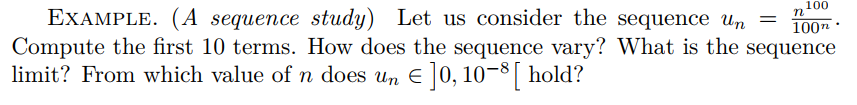

Define the sequence:

In [15]:
u(n) = (n^100)/100^n
u

n |--> n^100/100^n

In [16]:
[numerical_approx(u(i), digits=3) for i in range(1, 11)]

[0.0100,
 1.27e26,
 5.15e41,
 1.61e52,
 7.89e59,
 6.53e65,
 3.23e70,
 2.04e74,
 2.66e77,
 1.00e80]

Clearly it goes to infinity:

In [17]:
limit(u(n), n = oo)

0

Oops!!!

Graph the terms:

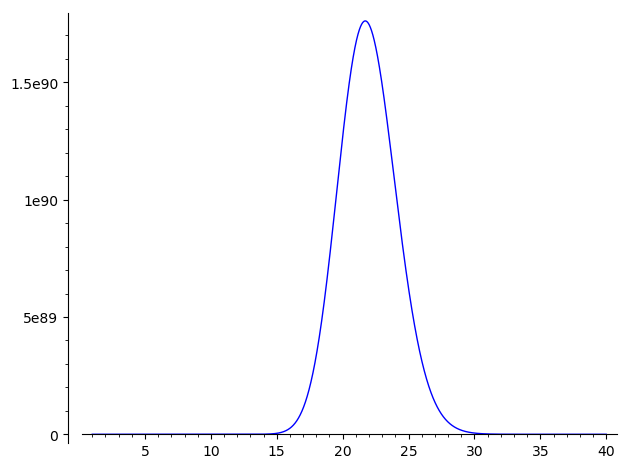

In [18]:
plot(u(n), n, 1, 40)

Looks like the sequence decreases from `n=22`...

In [19]:
minimize(-u(n), [20])

(21.714724095162623)

Or more precisely:

In [20]:
soln = solve(diff(u, n) == 0, n, solution_dict=True)
soln

[{n: 50/log(10)}, {n: 0}]

Pick the one where `n>0`:

In [21]:
numerical_approx(soln[0][n], digits=4)

21.71

# Series Expansion

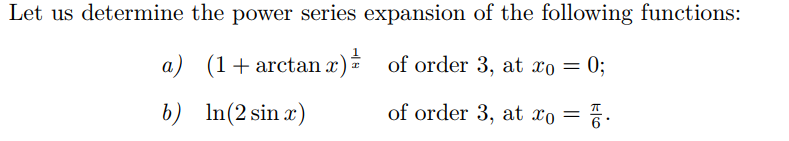

part (a):

In [22]:
expr_a = (1 + arctan(x))^(1/x)

In [23]:
expr_a.series(x == 0, 3)

(e) + (-1/2*e)*x + (1/8*e)*x^2 + Order(x^3)

To get just the regular part:

In [24]:
expr_a.series(x == 0, 3).truncate()

1/8*x^2*e - 1/2*x*e + e

# Taylor Expansion

In [25]:
# 3rd degree taylor expansion at x = 0
taylor(expr_a, x, 0, 3)

1/16*x^3*e + 1/8*x^2*e - 1/2*x*e + e

Expand at infinity:

In [26]:
assume(x > 0)
taylor(expr_a, x, oo, 3)

-(log(2) - log(pi + 2))/x + 1/2*(pi*(log(2)^2 - 2*log(2)*log(pi + 2) + log(pi + 2)^2) + 2*log(2)^2 - 4*log(2)*log(pi + 2) + 2*log(pi + 2)^2 - 4)/((pi + 2)*x^2) - 1/6*(pi^2*(log(2)^3 - 3*log(2)^2*log(pi + 2) + 3*log(2)*log(pi + 2)^2 - log(pi + 2)^3) + 4*log(2)^3 - 12*log(2)^2*log(pi + 2) - 4*log(pi + 2)^3 + 4*pi*(log(2)^3 - 3*log(2)^2*log(pi + 2) - log(pi + 2)^3 + 3*(log(pi + 2)^2 - 1)*log(2) + 3*log(pi + 2)) + 12*(log(pi + 2)^2 - 2)*log(2) + 24*log(pi + 2) + 12)/((4*pi + pi^2 + 4)*x^3) + 1

In [27]:
forget()

# Recurrence Series

To construct:

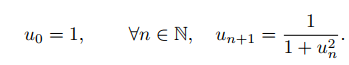

The value of $u_n$ when $n=20$:

In [28]:
# this is U0
U = 1

In [29]:
# for U1 and onwards
for n in [1..20]:
    U = 1/(1+U^2)
U

3075086360997772518632868663693887496939925510189427290243950859217126032873275704622382249830518721847952248775282472399137235866757130295121366182819298883408104132343954582215378535751303186647624425412327606134267964366959706971146761386632384617521102725817948555224352583007283268568516139929689824922735852635620545325194297886787910422916297561042735626408255904513714905371804396084510840921428348446508724257301076253430593907742052749889951997071055339470277537035546546035213753263575934078227065033263792311399795334817389688459699512155098189423241509680643574879623111700851546454178333795159068154229674357215284049366102748059003208850391339749153671433023109571304542192395236998892073396286949217893643635752382717758459215431582385079707714819169912103770236891125646573995348379197104406850256242664713136980626961667910795653330343671933626352125592810902476740576650657247542992976888074801059849168080571045236892694472241810031611537648249244215005064975169973050158742909739803376826906591964219982610969845523801590322780327622688253828577794395706496777524456928035367259393985718984377445702154850514720672253004517192217274915045273926424837120393047984121569355154080902665792704750369011715633375993211638409529112999952351465323436146432357869724729769917655659053614441441632814092739371147422128358883685613781021078328188181272520987706127313308879204632087698963375880189224291775590450602850743832138215845504767489021968351742930514777784545985695277869896901840351469443266551726045400520947439568679524727706236533701706413183165130353948295359987456446715148778898879960829482857244177102548699647565696922679510089068702325476235111333391567227883894011524527334125793134997436287818714069680566280893201512476046458026201371764667487070569258012900811000206839359296718429601688206425783256681755663797348469711007646392335818822171610511071966322778261402194688290262234959322980786145167182477853823459441127703408963788759837067182384834743147973124450689029235285799510991822457798546111818436664829299756284552648385562017931810285474712176579896951059143177446921795946865892021198226290273405661758378555463423381410863494420953304724579613329197944384224126245845122479933102381458160011311507709232845451124162417177336562186354696857393949737080604615350109211915629973869769809904438425677756203249850926358156855833798210559149501446607284669720100832828981617168985356266382792816083107478937286110869049250129464975606866413050354152687559152752841761911392779800073218740063459874130094103813348377767301597829170539147436049619819640242769190357941632534559366823572754384902468402369506525146723854682282725710368589895638234568039886861445518561032310897329784406065797493901093502993465779418203148225842119694154377677159985227010651545593241284368659962698091958161190234808518334921918125448614883230847795018602985315951403924895927124286632219797823902638693005161037425449450970134539237814841681630367775114759374520582074848807163662240336786322595332818432008731778337740305546207489806816943034699993188599346992199889970044156546030550743503654310458405358779339590618626597928134704512302885285410230518344843066563175062432793468554867999904398701262739508479720995605410474392704541616462340988957435540019790182862809776398424613623291709167796689087846805519015973787299736552884063722096079738411417264814498900770339537790365771567856157932308770308354498848029013793599810783633606734515712062452313134602580514634581542854419233635987673907046336535334805891659758219097931032026031199641145746896676788023626547733114819583318146834096569228535927469810820651234057132889932650011511514043478586894145905185914799520217385911888106818415346248447351696560056204394046937298697042926609768860909674321812036010322171461528384779752981813745790515046956667907951512596646441953535426652942001536617952094235879617207621377259256107062553977487316257140375154094066368640008563149607531008224219227622446539285652816662

In [30]:
numerical_approx(U, digits=4)

0.6824